In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
#классы дохода не сбалансированная
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [6]:
# ">50K" is 1
# "<=50K" is 0
df.loc[df['income'] == ">50K", 'income'] = 1 
df.loc[df['income'] == "<=50K", 'income'] = 0

In [7]:
y = df['income']
y = y.astype(int)
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int32

In [8]:
X = df.loc[:, df.columns != 'income']
X = pd.get_dummies(X)

In [9]:
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [11]:
X_sc

array([[-0.99512893,  0.35167453, -1.19725891, ...,  0.33808291,
        -0.04199864, -0.02170548],
       [-0.04694151, -0.94552415, -0.41933527, ...,  0.33808291,
        -0.04199864, -0.02170548],
       [-0.77631645,  1.3947231 ,  0.74755018, ...,  0.33808291,
        -0.04199864, -0.02170548],
       ...,
       [ 1.41180837, -0.35751025, -0.41933527, ...,  0.33808291,
        -0.04199864, -0.02170548],
       [-1.21394141,  0.11198424, -0.41933527, ...,  0.33808291,
        -0.04199864, -0.02170548],
       [ 0.97418341,  0.93049361, -0.41933527, ...,  0.33808291,
        -0.04199864, -0.02170548]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train_sc, X_test_sc, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state=42)

In [13]:
logreg  = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_sc  = LogisticRegression()
logreg_sc.fit(X_train_sc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
predict = logreg.predict(X_test)
predict_sc = logreg_sc.predict(X_test_sc)

In [15]:
score = logreg.score(X_test, y_test)
score_sc = logreg_sc.score(X_test_sc, y_test)

In [16]:
score

0.8036646534957519

In [17]:
score_sc

0.8574060804585935

In [22]:
#при применении нормализации данных (признаков) точность предсказания модели значительно повысилась

In [75]:
predictions = logreg.predict_proba(X_test)[:, 1]
y_test = y_test.reset_index(drop=True)

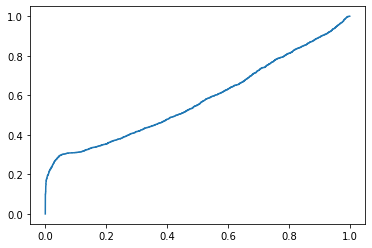

In [76]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
FPR, TPR, tresholds = roc_curve(y_test, predictions)
plt.plot(FPR, TPR)

In [84]:
FPR_list = []
TPR_list = []
recall_list = []
precision_list = []

thresholds = np.linspace(0, 1, 1000)

for ithresh in thresholds:
    y_pred = []
    
    for ipred in predictions:
        if ipred > ithresh:
            y_pred.append(1)
        else:
            y_pred.append(0)
    
    TP = 0
    FP = 0
    FN = 0
    TN = 0            

    for i in range(len(y_test)):
        if y_pred[i] == 1 and y_test[i] == 1:
            TP += 1
        if y_pred[i] == 1 and y_test[i] == 0:
            FP += 1
        if y_pred[i] == 0 and y_test[i] == 0:
            TN += 1
        if y_pred[i] == 0 and y_test[i] == 1:
            FN +=1
    
    try:
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        precision = TP / (TP + FP)
        recall = TPR
        
    except:
        pass
    
    TPR_list.append(TPR)
    FPR_list.append(FPR)
    precision_list.append(precision)
    recall_list.append(recall)

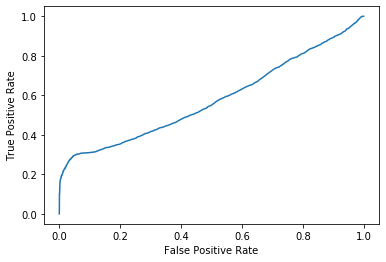

In [85]:
plt.plot(FPR_list, TPR_list)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

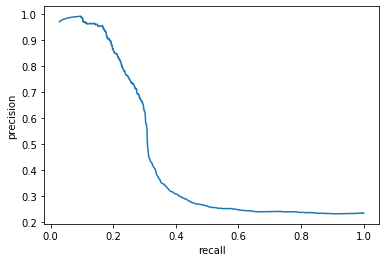

In [86]:
plt.plot(recall_list, precision_list)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()